In [ ]:
#info: Sentiment analysis using three algorithms:Naive bayes, support vector machine and logistic regression.

In [ ]:
#importing libraries to be used
import tweepy
from tweepy import *
import pandas as pd
import csv
import re 
import string
import pandas as pd
import numpy as np
import joblib
import sklearn
import nltk
from sklearn import *
from nltk import *
import string
from textblob import TextBlob  
from wordcloud import WordCloud
import re                        
import matplotlib.pyplot as plt   
plt.style.use('Solarize_Light2');
import tweepy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob.sentiments import NaiveBayesAnalyzer
from sklearn.model_selection import train_test_split
!pip install snscrape
import snscrape.modules.twitter as sntwitter
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import classify
from nltk import NaiveBayesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.svm import SVC



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
query = "(to:Amazon) until:2022-01-01 since:2010-01-01"
tweets = []
limit = 5000


for tweet in sntwitter.TwitterSearchScraper(query).get_items():
     if len(tweets) == limit:
        break
     else:
        tweets.append([tweet.date, tweet.username, tweet.content])
        
data = pd.DataFrame(tweets, columns=['Date', 'User', 'text'])
print(data)

                          Date             User  \
0    2021-12-31 23:47:24+00:00        shelle_24   
1    2021-12-31 23:28:16+00:00      Darkonis666   
2    2021-12-31 23:26:02+00:00  sakshampodcasts   
3    2021-12-31 23:19:06+00:00  RajeshS66874471   
4    2021-12-31 23:17:11+00:00   NicoleBersenev   
...                        ...              ...   
4995 2021-12-14 12:57:49+00:00       mscSaharan   
4996 2021-12-14 12:55:23+00:00    nikki76769713   
4997 2021-12-14 12:51:50+00:00   IDYLLWILDMOVIE   
4998 2021-12-14 12:50:03+00:00   mirthblaster36   
4999 2021-12-14 12:47:55+00:00           smenor   

                                                   text  
0     @amazon prime is not priming no more 2 day del...  
1     @amazon got 5 hours 32 minutes to empty my Ama...  
2                   @amazon How fast can this thing go?  
3     @amazon #Rajesh kumar singh. Sir i am win this...  
4     @amazon just because its new years eve that do...  
...                                    

In [ ]:
from google.colab import files
data.to_csv('Amazontwts.csv')
files.download('Amazontwts.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Amazontwts.csv to Amazontwts.csv


In [ ]:
dt = pd.read_csv('Amazontwts.csv')
df = pd.DataFrame(dt, columns=['text'])
df

,text
0,@amazon prime is not priming no more 2 day del...
1,@amazon got 5 hours 32 minutes to empty my Ama...
2,@amazon How fast can this thing go?
3,@amazon #Rajesh kumar singh. Sir i am win this...
4,@amazon just because its new years eve that do...
...,...
4995,@amazon @amazonIN Why your app suddenly stoppe...
4996,@amazon I suggest someone from management cont...
4997,"@amazon @JeffBezos I am evil, I am @JeffBezos ..."
4998,"@amazon Or, you know, get crushed in an Amazon..."


In [ ]:
#remove emojis and non-ascii characters
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')
df['text']=df['text'].apply(deEmojify)
df

,text
0,@amazon prime is not priming no more 2 day del...
1,@amazon got 5 hours 32 minutes to empty my Ama...
2,@amazon How fast can this thing go?
3,@amazon #Rajesh kumar singh. Sir i am win this...
4,@amazon just because its new years eve that do...
...,...
4995,@amazon @amazonIN Why your app suddenly stoppe...
4996,@amazon I suggest someone from management cont...
4997,"@amazon @JeffBezos I am evil, I am @JeffBezos ..."
4998,"@amazon Or, you know, get crushed in an Amazon..."


In [ ]:
#Preprocessing data before use
def preprocess_data(dt):
  #remove special characters e.g @,# 
  dt=re.sub(r'@[A-Za-z0-9]+','',dt)
  dt=re.sub(r'#','',dt)
  dt=re.sub(r':','',dt)
  dt=re.sub(r'$','',dt)
  dt=re.sub("[()]","", dt)
  dt=re.sub(r'RT[\s]+','',dt)
  dt=re.sub(r'https?:\/\/\S+','',dt)
  dt=re.sub(r'http\S+', '', dt)
  return dt

df['text']=df['text'].apply(preprocess_data)

df

,text
0,prime is not priming no more 2 day delivery?
1,got 5 hours 32 minutes to empty my Amazon car...
2,How fast can this thing go?
3,Rajesh kumar singh. Sir i am win this spin lu...
4,just because its new years eve that doesn't m...
...,...
4995,Why your app suddenly stopped working on sam...
4996,I suggest someone from management contacts me...
4997,"I am evil, I am"
4998,"Or, you know, get crushed in an Amazon wareho..."


In [ ]:
#change to lower case
def lwr_case(df):
    df['text'] = df['text'].str.strip().str.lower()
    return df

df['text'] = lwr_case(df)

df

,text
0,prime is not priming no more 2 day delivery?
1,got 5 hours 32 minutes to empty my amazon cart...
2,how fast can this thing go?
3,rajesh kumar singh. sir i am win this spin luc...
4,just because its new years eve that doesn't me...
...,...
4995,why your app suddenly stopped working on samsu...
4996,i suggest someone from management contacts me....
4997,"i am evil, i am"
4998,"or, you know, get crushed in an amazon warehou..."


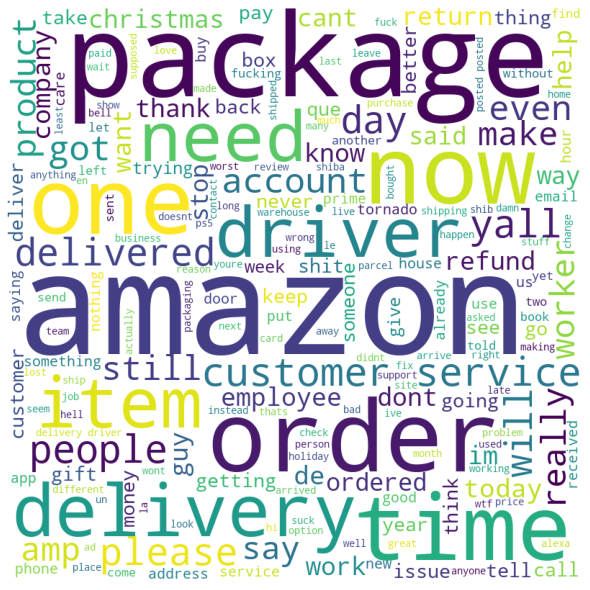

In [ ]:
#word cloud
from wordcloud import WordCloud, STOPWORDS
wc=' '.join([txt for txt in df['text']])
#stopwords
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800, random_state=21,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(wc)
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## Naive Bayes Classifier.

In [ ]:
#getting a set of positive and negative tweets to train our data
nltk.download('twitter_samples')
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import twitter_samples
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')


[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


In [ ]:
#tokenizing
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

def tokenize_tweet(tweet):
    
    tweet_tokens = tokenizer.tokenize(tweet)
    
    return tweet_tokens
tkns=df['text'].apply(tokenize_tweet)
print (tkns)

0       [prime, is, not, priming, no, more, 2, day, de...
1       [got, 5, hours, 32, minutes, to, empty, my, am...
2                    [how, fast, can, this, thing, go, ?]
3       [rajesh, kumar, singh, ., sir, i, am, win, thi...
4       [just, because, its, new, years, eve, that, do...
                              ...                        
4995    [why, your, app, suddenly, stopped, working, o...
4996    [i, suggest, someone, from, management, contac...
4997                              [i, am, evil, ,, i, am]
4998    [or, ,, you, know, ,, get, crushed, in, an, am...
4999                [kindness, ., the, greatest, gift, .]
Name: text, Length: 5000, dtype: object


In [ ]:
#Removing stopwords and punctuations
nltk.download('stopwords')
from nltk.corpus import stopwords
stpwrds_en = stopwords.words('english')

puncts = string.punctuation

def remove_stopwords_punctuations(tweet_tokens):
    
    tweets_clean = []
    
    for word in tweet_tokens:
        if (word not in stpwrds_en and word not in puncts):
            tweets_clean.append(word)
            
    return tweets_clean


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stmr = PorterStemmer()

def get_stem(tweets_clean):
    
    tweets_stem = []
    
    for word in tweets_clean:
        stem_word = stmr.stem(word)
        tweets_stem.append(stem_word)
        
    return tweets_stem

In [ ]:
#combining the three preprocesses
def process_tweet(tweet):
    tweet_tokens = tokenize_tweet(tweet)
    tweets_clean = remove_stopwords_punctuations(tweet_tokens)
    tweets_stem = get_stem(tweets_clean)
    
    return tweets_stem

In [ ]:
cleantkns=df['text'].apply(process_tweet)
print (cleantkns)

0                        [prime, prime, 2, day, deliveri]
1       [got, 5, hour, 32, minut, empti, amazon, cart,...
2                                       [fast, thing, go]
3       [rajesh, kumar, singh, sir, win, spin, lucki, ...
4       [new, year, eve, mean, driver, shit, lazi, fuc...
                              ...                        
4995    [app, suddenli, stop, work, samsung, sm-j, 250...
4996           [suggest, someon, manag, contact, disgrac]
4997                                               [evil]
4998    [know, get, crush, amazon, warehous, inadequ, ...
4999                               [kind, greatest, gift]
Name: text, Length: 5000, dtype: object


In [ ]:

train_pos = all_positive_tweets
train_neg = all_negative_tweets
test_pos = all_positive_tweets
test_neg = all_negative_tweets

train_x = train_pos + train_neg
test_x = test_pos + test_neg
train_y = np.append(np.ones(len(train_pos)), np.zeros(len(train_neg)))
test_y = np.append(np.ones(len(test_pos)), np.zeros(len(test_neg)))

In [ ]:
#frequency dictionary
def create_freq(tweets, ys):
    
    freq_d = {}

    for tweet,y in zip(tweets,ys):
      for word in process_tweet(tweet):
        pair=(word,y)
        if pair in freq_d:
          freq_d[pair]+=1
        else:
          freq_d[pair]=freq_d.get(pair,1)
    return freq_d

In [ ]:
#using the frequency dictionary
freqs = create_freq(train_x, train_y)
tweet = ['i am glad', 'i am tricked', 'i am sad', 'i am tired', 'i am tired','i am tired','i am happy']
ys = [1, 0, 0, 0, 0,1]

freq_d = create_freq(tweet, ys)
print(freq_d)

{('glad', 1): 1, ('trick', 0): 1, ('sad', 0): 1, ('tire', 0): 2, ('tire', 1): 1}


In [ ]:
#the naive bayes model here
def naive_bayes_train(freqs, train_x, train_y):
    
    loglikelihood = {}   #dict. with probab of a word being pos vs neg
    logprior = 0     #probability of a tweet being pos vs neg
    
    #work with unique words
    unique_words = set([pair[0] for pair in freqs.keys()])
    V = len(unique_words)
    
    #num of pos and neg tweets
    N_pos = N_neg = 0
    for pair in freqs.keys():
        if pair[1]>0:
          N_pos+=freqs[(pair)]
        else:
          N_neg+=freqs[(pair)] 
    
    #number of tweets
    num = train_y.shape[0]
    num_pos = sum(train_y)#number pos tweets
    num_neg = num-sum(train_y)#numer neg tweets
    
    #number of pos/number of neg tweets
    logprior = np.log(num_pos)-np.log(num_neg)
    
    
    for word in unique_words:
        
       #get the frequency of pos or neg 
        freq_pos = freqs.get((word,1),0)
        freq_neg =  freqs.get((word,0),0)
        
       #probab of a word being pos or neg
        probab_w_pos = (freq_pos+1)/(N_pos+V)
        probab_w_neg = (freq_neg+1)/(N_neg+V)
        
        #calculate the likelihood of a word
        loglikelihood[word] = np.log(probab_w_pos/probab_w_neg)
        
    return logprior, loglikelihood

    

In [ ]:
logprior, loglikelihood = naive_bayes_train(freqs, train_x, train_y)
print(logprior)
print(len(loglikelihood))

0.0
12432


In [ ]:
def predict_naive_bayes(tweet, logprior, loglikelihood):
  
    wrd = process_tweet(tweet)
    probab = 0
    probab += logprior
    for word in wrd:        
        if word in loglikelihood:
          probab+=loglikelihood[word]

    return probab

In [ ]:
#for each tweet in amazon text column determine its sentiment
amazondf=[]
for tweet in df['text']:
    analysis = predict_naive_bayes(tweet, logprior, loglikelihood)
    amazondf.append([tweet,analysis])


In [ ]:
dframe= pd.DataFrame(amazondf, columns=['text', 'Twt_Sentiment'])
dframe

,text,Twt_Sentiment
0,prime is not priming no more 2 day delivery?,2.493141
1,got 5 hours 32 minutes to empty my amazon cart...,-0.210981
2,how fast can this thing go?,-0.671389
3,rajesh kumar singh. sir i am win this spin luc...,0.946028
4,just because its new years eve that doesn't me...,-5.038691
...,...,...
4995,why your app suddenly stopped working on samsu...,-1.002384
4996,i suggest someone from management contacts me....,-0.467437
4997,"i am evil, i am",-0.029123
4998,"or, you know, get crushed in an amazon warehou...",-0.827532


In [ ]:
def analysis(texanaly):
  if texanaly<0:
    return 'Negative'
  elif texanaly==0:
    return 'Neutral'
  else:
    return 'Positive'
  return 

dframe['Sentiment']=dframe['Twt_Sentiment'].apply(analysis)

dframe

,text,Twt_Sentiment,Sentiment
0,prime is not priming no more 2 day delivery?,2.493141,Positive
1,got 5 hours 32 minutes to empty my amazon cart...,-0.210981,Negative
2,how fast can this thing go?,-0.671389,Negative
3,rajesh kumar singh. sir i am win this spin luc...,0.946028,Positive
4,just because its new years eve that doesn't me...,-5.038691,Negative
...,...,...,...
4995,why your app suddenly stopped working on samsu...,-1.002384,Negative
4996,i suggest someone from management contacts me....,-0.467437,Negative
4997,"i am evil, i am",-0.029123,Negative
4998,"or, you know, get crushed in an amazon warehou...",-0.827532,Negative


<function matplotlib.pyplot.show>

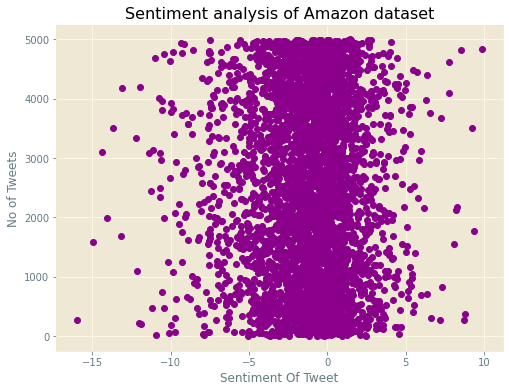

In [ ]:
plt.figure(figsize=(8,6))
for i in range(0,dframe.shape[0]):
  plt.scatter(dframe['Twt_Sentiment'][i],[i],color="darkmagenta")
plt.title('Sentiment analysis of Amazon dataset')
plt.ylabel('No of Tweets')
plt.xlabel('Sentiment Of Tweet')
plt.show

In [ ]:
dframe['Sentiment'].value_counts()

Negative    2705
Positive    1331
Neutral      964
Name: Sentiment, dtype: int64

<function matplotlib.pyplot.show>

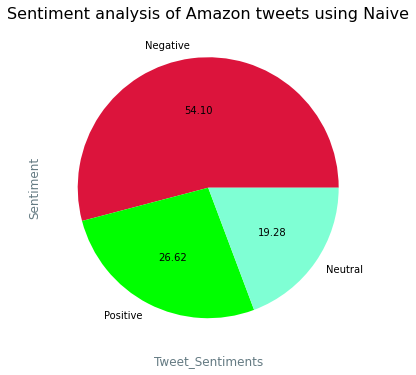

In [70]:
plt.title('Sentiment analysis of Amazon tweets using Naive')
plt.xlabel('Tweet_Sentiments')
dframe['Sentiment'].value_counts().plot(kind='pie',colors=["crimson", "lime", "aquamarine"],
    autopct="%.2f",figsize=(6, 6))
plt.show

In [ ]:
print(len(test_x),  len(train_x))

10000 10000


Calculating the accuracy of the naive bayes model used

In [ ]:
from sklearn.naive_bayes import MultinomialNB
# Vectorize train_x to numbers
vec = CountVectorizer(stop_words='english')
train_x = vec.fit_transform(train_x).toarray()
test_x = vec.transform(test_x).toarray()

model = MultinomialNB()
model.fit(train_x, train_y)
model.score(test_x, test_y)

0.9361

## Using Support Vector Machine.(SVN)

In [ ]:
#model 1
from sklearn.feature_extraction.text import TfidfVectorizer

import time
from sklearn import svm
from sklearn.metrics import classification_report

# train Data
trainData = pd.read_csv("https://raw.githubusercontent.com/Vasistareddy/sentiment_analysis/master/data/train.csv")

# test Data
testData = pd.read_csv("https://raw.githubusercontent.com/Vasistareddy/sentiment_analysis/master/data/test.csv")

# Create feature vectors
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)

train_vectors = vectorizer.fit_transform(trainData['Content'])
test_vectors = vectorizer.transform(testData['Content'])

# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(train_vectors, trainData['Label'])
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1

# results

report = classification_report(testData['Label'], prediction_linear, output_dict=True)
print('positive: ', report['pos'])
print('negative: ', report['neg'])

positive:  {'precision': 0.9191919191919192, 'recall': 0.91, 'f1-score': 0.9145728643216081, 'support': 100}
negative:  {'precision': 0.9108910891089109, 'recall': 0.92, 'f1-score': 0.9154228855721394, 'support': 100}


In [ ]:
amazondf=[]
for tweet in df['text']:
    review_vector = vectorizer.transform([tweet]) 
    b=classifier_linear.predict(review_vector)
    amazondf.append([tweet,b])

In [ ]:
svm_df= pd.DataFrame(amazondf, columns=['text', 'Sentiment'])
svm_df

,text,Sentiment
0,prime is not priming no more 2 day delivery?,[pos]
1,got 5 hours 32 minutes to empty my amazon cart...,[neg]
2,how fast can this thing go?,[neg]
3,rajesh kumar singh. sir i am win this spin luc...,[neg]
4,just because its new years eve that doesn't me...,[neg]
...,...,...
4995,why your app suddenly stopped working on samsu...,[neg]
4996,i suggest someone from management contacts me....,[pos]
4997,"i am evil, i am",[neg]
4998,"or, you know, get crushed in an amazon warehou...",[neg]


In [ ]:
#model 2
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [ ]:
np.random.seed(1)

pipeline_svm = make_pipeline(vectorizer, 
                            SVC(probability=True, kernel="linear", class_weight="balanced"))

grid_svm = GridSearchCV(pipeline_svm,
                    param_grid = {'svc__C': [0.01, 0.1, 1]}, 
                    cv = kfolds,
                    scoring="roc_auc",
                    verbose=1,   
                    n_jobs=-1) 


In [ ]:

grid_svm.fit(train_x, train_y)
grid_svm.score(test_x, test_y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


0.9501091999999999

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score
def report_results(model, X, y):
    pred_proba = model.predict_proba(X)[:, 1]
    pred = model.predict(X)        

    auc = roc_auc_score(y, pred_proba)
    acc = accuracy_score(y, pred)
    f1 = f1_score(y, pred)
    prec = precision_score(y, pred)
    rec = recall_score(y, pred)
    result = {'auc': auc, 'f1': f1, 'accuracy': acc, 'precision': prec, 'recall': rec}
    return result

In [ ]:
report_results(grid_svm.best_estimator_, test_x, test_y)

{'accuracy': 0.8834,
 'auc': 0.9501148,
 'f1': 0.878970313473116,
 'precision': 0.9136814846784636,
 'recall': 0.8468}

In [ ]:
def get_roc_curve(model, X, y):
    pred_proba = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, pred_proba)
    return fpr, tpr

In [ ]:
roc_svm = get_roc_curve(grid_svm.best_estimator_, test_x, test_y)

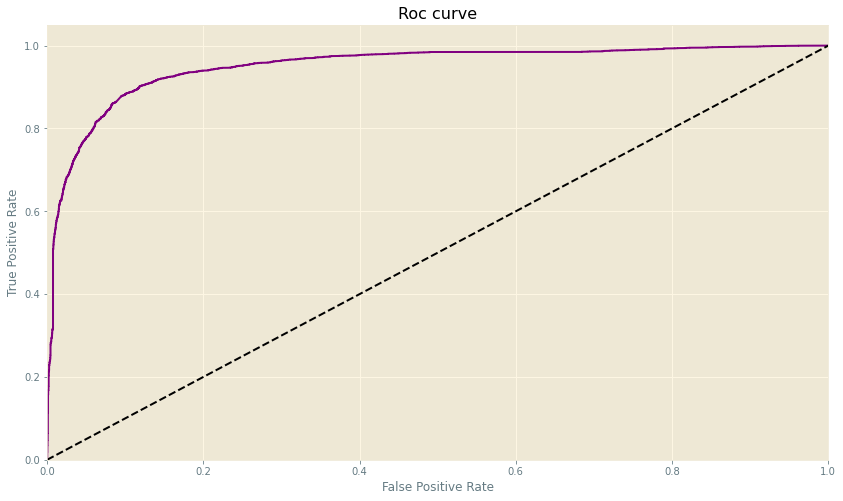

In [ ]:
fpr, tpr = roc_svm
plt.figure(figsize=(14,8))
plt.plot(fpr, tpr, color="purple")
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc curve')
plt.show()

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = \
    learning_curve(grid_svm.best_estimator_, train_x, train_y, cv=5, n_jobs=-1, 
                   scoring="roc_auc", train_sizes=np.linspace(.1, 1.0, 10), random_state=1)

In [ ]:
def plot_learning_curve(X, y, train_sizes, train_scores, test_scores, title='', ylim=None, figsize=(14,8)):

    plt.figure(figsize=figsize)
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="purple")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="orangered")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="purple",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="orangered",
             label="Cross-validation score")

    plt.legend(loc="lower right")
    return plt

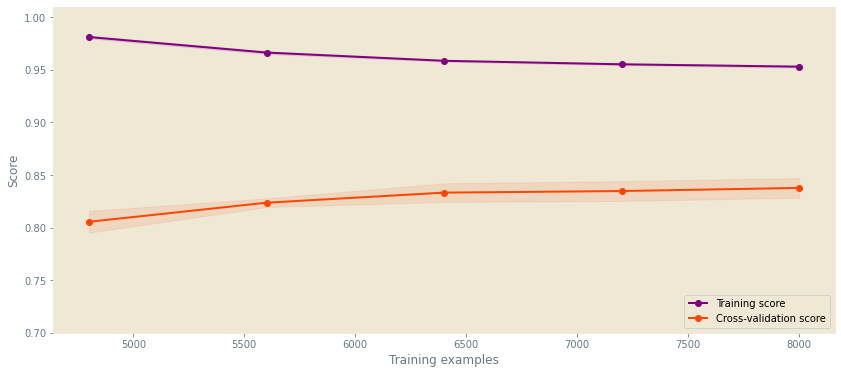

In [ ]:
plot_learning_curve(train_x, train_y, train_sizes, 
                    train_scores, test_scores, ylim=(0.7, 1.01), figsize=(14,6))
plt.show()

In [ ]:
#for each tweet in amazon text column determine its sentiment
svm=[]
for tweet in df['text']:
    pred_svm=grid_svm.predict([tweet])
    svm.append([tweet,pred_svm])


In [ ]:
#print out the result above
svm_df= pd.DataFrame(svm, columns=['text', 'Twt_Sentiment'])
svm_df

,text,Twt_Sentiment
0,prime is not priming no more 2 day delivery?,[0.0]
1,got 5 hours 32 minutes to empty my amazon cart...,[1.0]
2,how fast can this thing go?,[0.0]
3,rajesh kumar singh. sir i am win this spin luc...,[0.0]
4,just because its new years eve that doesn't me...,[0.0]
...,...,...
4995,why your app suddenly stopped working on samsu...,[0.0]
4996,i suggest someone from management contacts me....,[0.0]
4997,"i am evil, i am",[0.0]
4998,"or, you know, get crushed in an amazon warehou...",[1.0]


In [73]:
def analysis(texanaly):
  if texanaly==0:
    return 'Negative'
  else:
    return 'Positive'
  return 

svm_df['Sentiment']=svm_df['Twt_Sentiment'].apply(analysis)

svm_df

,text,Twt_Sentiment,Sentiment
0,prime is not priming no more 2 day delivery?,[0.0],Negative
1,got 5 hours 32 minutes to empty my amazon cart...,[1.0],Positive
2,how fast can this thing go?,[0.0],Negative
3,rajesh kumar singh. sir i am win this spin luc...,[0.0],Negative
4,just because its new years eve that doesn't me...,[0.0],Negative
...,...,...,...
4995,why your app suddenly stopped working on samsu...,[0.0],Negative
4996,i suggest someone from management contacts me....,[0.0],Negative
4997,"i am evil, i am",[0.0],Negative
4998,"or, you know, get crushed in an amazon warehou...",[1.0],Positive


<function matplotlib.pyplot.show>

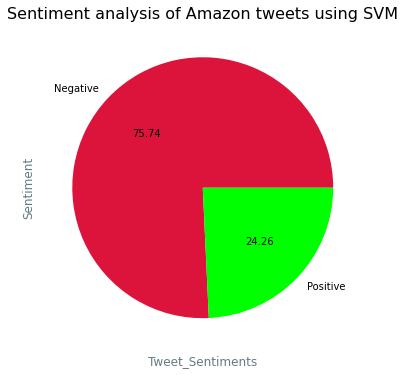

In [74]:
plt.title('Sentiment analysis of Amazon tweets using SVM')
plt.xlabel('Tweet_Sentiments')
svm_df['Sentiment'].value_counts().plot(kind='pie',colors=["crimson", "lime"],
    autopct="%.2f",figsize=(6, 6))
plt.show

# Logistic Regression


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None)

param_grid = [{'vect__ngram_range': [(1, 1)],
               'clf__C': [1.0, 10.0, 100.0]},
              {'vect__ngram_range': [(1, 1)],
               'vect__use_idf':[False],
               'vect__norm':[None],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
              ]

lr_tfidf = Pipeline([('vect', tfidf),
                     ('clf', LogisticRegression(random_state=0))])

gs_lr_tfidf = GridSearchCV(lr_tfidf, param_grid = {'clf__C': [0.01, 0.1, 1]},
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)


In [ ]:
train_pos = all_positive_tweets
train_neg = all_negative_tweets
test_pos = all_positive_tweets
test_neg = all_negative_tweets

train_x = train_pos + train_neg
test_x = test_pos + test_neg
train_y = np.append(np.ones(len(train_pos)), np.zeros(len(train_neg)))
test_y = np.append(np.ones(len(test_pos)), np.zeros(len(test_neg)))

gs_lr_tfidf.fit(train_x, train_y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(lowercase=False)),
                                       ('clf',
                                        LogisticRegression(random_state=0))]),
             n_jobs=-1, param_grid={'clf__C': [0.01, 0.1, 1]},
             scoring='accuracy', verbose=1)

In [ ]:
#calculating the accuracy of the logistic model
clf = gs_lr_tfidf.best_estimator_
print('Accuracy in test: %.3f' % clf.score(test_x, test_y))

Accuracy in test: 0.896


In [86]:
#for each tweet in amazon text column determine its sentiment
log_model=[]
twts=df['text']
pred_log = clf.predict(df['text'])    
for i in range(len(twts)):
    print(f'{twts[i]} --> {pred_log[i]}')
    log_model.append([twts[i],pred_log[i]])



Streaming output truncated to the last 5000 lines.
whatever happened to the post call/chat survey? your agents are deliberately dropping the calls. customer "care" is getting worse every single minute! --> 1.0
this you... --> 1.0
inclusion --> 0.0
i think you need to review your packaging. a huge envelope for 2 small stylus pens in ridiculous --> 1.0
please.... why so much packaging for a small umbrella? such a waste! --> 0.0
six deaths at warehouse and people can't leave if there not feeling well enough is enough you greedy fucking assholes you clearly have no soul --> 0.0
wtf alexa --> 0.0
can't log in to account, trying to contact customer service, can't contact customer service without logging in... --> 0.0
what happened to the free grocery delivery. it was touted as one of the perks of my prime membership!! --> 0.0
this just goes to show how arrogant the public still are when it comes to covid symptoms. if you can not longer smell food or unpleasant smells. you must have a covid t

In [87]:
#print out the result above
log_reg_df= pd.DataFrame(log_model, columns=['text', 'Twt_Sentiment'])
log_reg_df

,text,Twt_Sentiment
0,prime is not priming no more 2 day delivery?,0.0
1,got 5 hours 32 minutes to empty my amazon cart...,1.0
2,how fast can this thing go?,0.0
3,rajesh kumar singh. sir i am win this spin luc...,0.0
4,just because its new years eve that doesn't me...,0.0
...,...,...
4995,why your app suddenly stopped working on samsu...,0.0
4996,i suggest someone from management contacts me....,0.0
4997,"i am evil, i am",0.0
4998,"or, you know, get crushed in an amazon warehou...",1.0


In [88]:
def analysis(texanaly):
  if texanaly==0:
    return 'Negative'
  else:
    return 'Positive'
  return 

log_reg_df['Sentiment']=log_reg_df['Twt_Sentiment'].apply(analysis)

log_reg_df

,text,Twt_Sentiment,Sentiment
0,prime is not priming no more 2 day delivery?,0.0,Negative
1,got 5 hours 32 minutes to empty my amazon cart...,1.0,Positive
2,how fast can this thing go?,0.0,Negative
3,rajesh kumar singh. sir i am win this spin luc...,0.0,Negative
4,just because its new years eve that doesn't me...,0.0,Negative
...,...,...,...
4995,why your app suddenly stopped working on samsu...,0.0,Negative
4996,i suggest someone from management contacts me....,0.0,Negative
4997,"i am evil, i am",0.0,Negative
4998,"or, you know, get crushed in an amazon warehou...",1.0,Positive


<function matplotlib.pyplot.show>

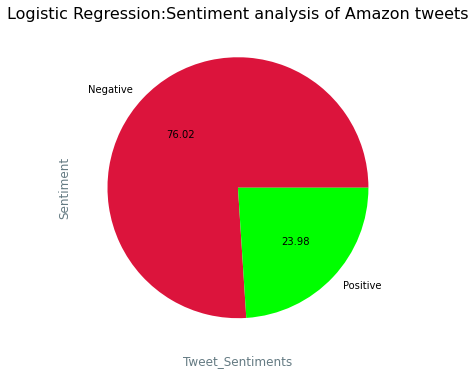

In [89]:
plt.title('Logistic Regression:Sentiment analysis of Amazon tweets')
plt.xlabel('Tweet_Sentiments')
log_reg_df['Sentiment'].value_counts().plot(kind='pie',colors=["crimson", "lime"],
    autopct="%.2f",figsize=(6, 6))
plt.show